# Similarity Score

In [3]:
from zalign import ZScore
from rdkit import Chem


fp_sdf_q = "/home/lccdp/Projects/clion/Uni-Dock2/unidock/unidock_engine/examples/align_Bace/CAT-13g.sdf"
fp_sdf_t = "/home/lccdp/Projects/clion/Uni-Dock2/unidock/unidock_engine/examples/align_Bace/reference.sdf"

mol_q = Chem.SDMolSupplier(fp_sdf_q, removeHs=False)[0]
mol_t = Chem.SDMolSupplier(fp_sdf_t, removeHs=False)[0]

matrix = ZScore(mol_q, mol_t).score()

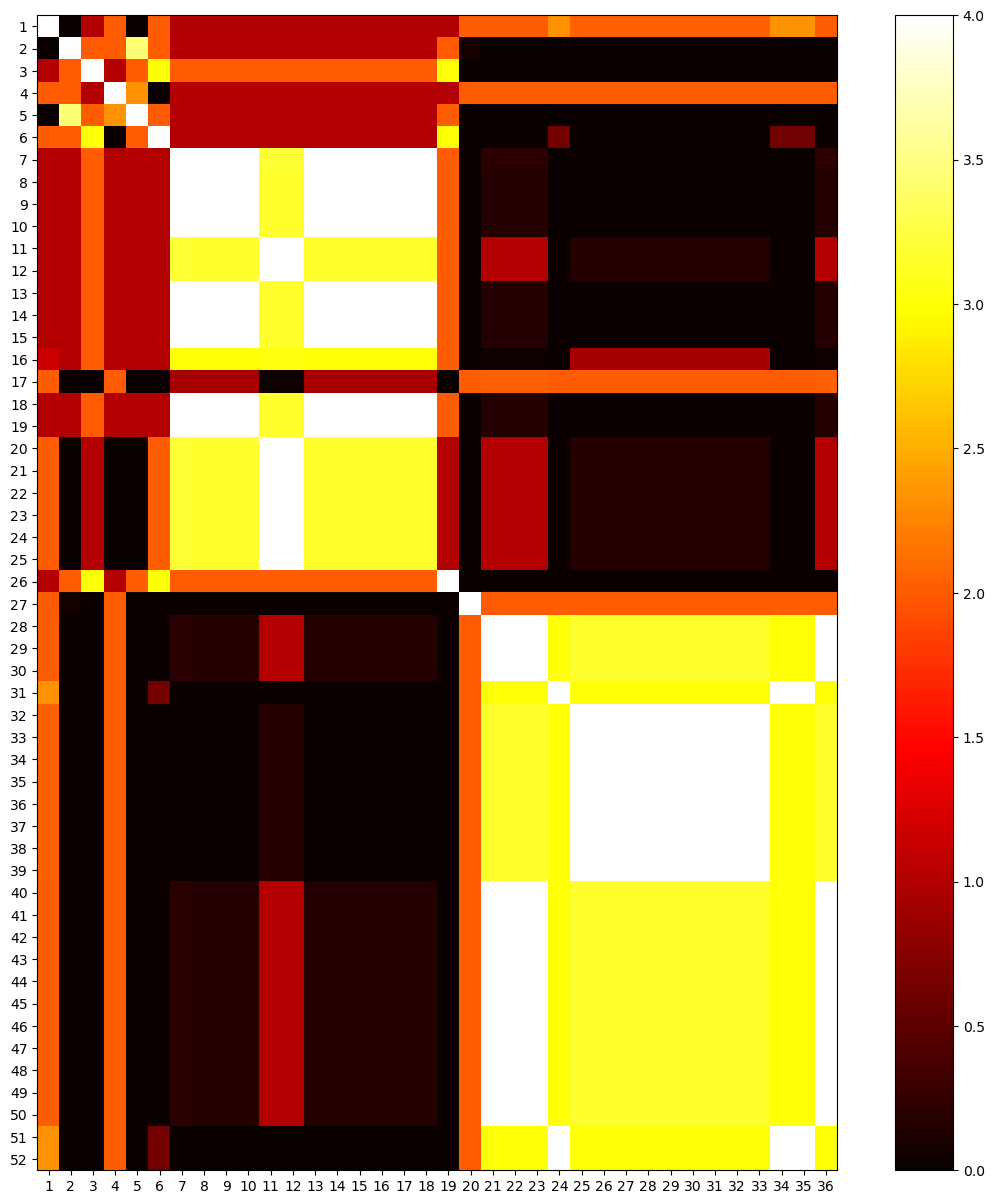

In [4]:
# show this similarity score matrix using matplotlib, with a matrix heatmap
import matplotlib.pyplot as plt
import numpy as np


# show the matrix heatmap
plt.figure(figsize=(15, 15))
plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.colorbar()

# add x and y axis ticks as the atom index of each molecule
plt.xticks(range(matrix.shape[1]), range(1, matrix.shape[1] + 1))
plt.yticks(range(matrix.shape[0]), range(1, matrix.shape[0] + 1))

plt.show()

In [6]:
# 用plotly绘制相似性得分矩阵的热力图，可以交互式查看横纵坐标
import plotly.graph_objs as go
import numpy as np

# 构造x轴和y轴标签（原子索引从1开始）
x_labels = [str(i+1) for i in range(matrix.shape[1])]
y_labels = [str(i+1) for i in range(matrix.shape[0])]

heatmap = go.Heatmap(
    z=matrix,
    x=x_labels,
    y=y_labels,
    colorscale='Hot',
    colorbar=dict(title='Score'),
    hoverongaps=False,
    hovertemplate='Query Atom: %{y}<br>Target Atom: %{x}<br>Score: %{z}<extra></extra>'
)

layout = go.Layout(
    title='Similarity Score Matrix',
    xaxis=dict(title='Target Molecule Atom Index'),
    yaxis=dict(title='Query Molecule Atom Index'),
    width=900,
    height=900
)

fig = go.Figure(data=[heatmap], layout=layout)
fig.show()

## 准备输入JSON

# Utils

## Transfer .MOL file to .SDF File

In [22]:
def transfer_mol_to_sdf(mol_file_path):
    fp_sdf = mol_file_path.replace(".mol", ".sdf")
    mol = Chem.MolFromMolFile(mol_file_path)
    Chem.MolToMolFile(mol, fp_sdf)
    return fp_sdf

transfer_mol_to_sdf("/home/lccdp/Projects/clion/Uni-Dock2/unidock/unidock_engine/examples/align_Bace/test_all_rings.mol")

'/home/lccdp/Projects/clion/Uni-Dock2/unidock/unidock_engine/examples/align_Bace/test_all_rings.sdf'

# Attractive Energy

# Repulsive Energy